# Simple vs Log Returns and Normality Assumption

We will be looking at the difference between simple returns and log returns


Motivation: 
    
        - Simple returns:  The product of normally distributed variables is NOT normally distributed
        
        - Log returns:  The sum of normally distributed variables DOES follow a normal distribution
        
Later we will see why we have product or sum of returns!


In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

from pandas_datareader import data as pdr
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [3]:
end = dt.datetime.now()
start = dt.datetime(2020, 1, 1)

yf.pdr_override()
df = pdr.get_data_yahoo('TSLA', start, end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


# Simple Returns
**For one period**


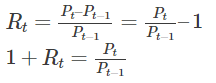

In [4]:
simple_returns = df.Close.pct_change()
simple_returns

Date
2020-01-02         NaN
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
2020-01-08    0.049205
                ...   
2023-07-21   -0.010955
2023-07-24    0.034767
2023-07-25   -0.014049
2023-07-26   -0.003506
2023-07-27   -0.032684
Name: Close, Length: 898, dtype: float64

In [5]:
simple_returns.dropna()  # Due to formula, we cant have day 0 return ...

Date
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
2020-01-08    0.049205
2020-01-09   -0.021945
                ...   
2023-07-21   -0.010955
2023-07-24    0.034767
2023-07-25   -0.014049
2023-07-26   -0.003506
2023-07-27   -0.032684
Name: Close, Length: 897, dtype: float64

#### To compute the return across multiple days (return singular) 
    
   It is called multi-period return:
    
          We have to multiply the different returns for each day to get the sum of returns over that period.
    

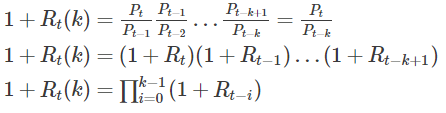

This is where the product comes from

In [6]:
df.Close.plot()

Testing the limitations of simple returns:

In [7]:
print('First', df.Close[0], 'last', df.Close[-1])

First 28.68400001525879 last 255.7100067138672


In [8]:
# Average across all above days:

simple_returns.mean()

0.00341930135075252

In [20]:
# Let's "try" to take close price and compute simple return everyday, This should give us our final stock price of TSLA

" We start from Close[0], and multiplying this everyday by .mean() and taking it to the power of day number, should give df.Close[-1]"

df.Close[0] * (1 + simple_returns.mean())**len(simple_returns)

df.Close[0] * (1 + 0.003423181203071985)**len(simple_returns)

617.1466730356598

In [10]:
df.Close[-1]

255.7100067138672

#### So it doesn't give the right price, we need to instead use the 3rd equation, taking the product of all the (1 + daily returns)


The mean() is no longer a useful statistic, it doesn't mean much to us (we cant use it like normally would).


**Below we do it the right way:**

In [11]:
# Let us do it the right way now, using 3rd eqt.

df.Close[0] * np.prod( [(1 + Rt) for Rt in simple_returns.dropna()] )
    

255.7100067138674

In [12]:
# Implementing the first equation to get the last return on day [-1]  (last day)


for i in range(0, len(simple_returns)):
    holder = 1
    if i > 0:
        a = df.Close[i]/df.Close[i-1]
        holder = holder * a
Rt = holder - 1
print(Rt)

-0.032683938680391544


In [13]:
simple_returns[-1]

-0.032683938680391544

# Log returns:

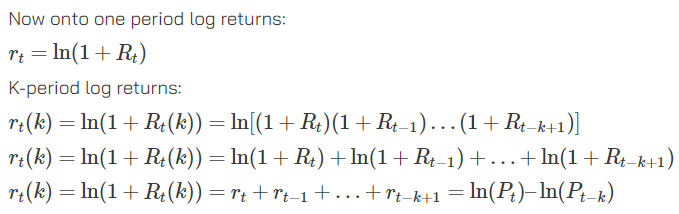

Log returns have the property: Adding the daily returns over time, it is descriptive of the dataset!

In [17]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()   # Log(Close[n] / Close[n-1])
log_returns

Date
2020-01-03    0.029203
2020-01-06    0.019072
2020-01-07    0.038067
2020-01-08    0.048033
2020-01-09   -0.022189
                ...   
2023-07-21   -0.011015
2023-07-24    0.034176
2023-07-25   -0.014149
2023-07-26   -0.003512
2023-07-27   -0.033230
Name: Close, Length: 897, dtype: float64

In [18]:
log_returns.mean()

0.0024389125301739136

In [21]:
df.Close[0] * np.exp(log_returns.mean() * len(log_returns))

255.7100067138672

### But! This isn't the main reason we use log returns!


– Simple Returns: The product of normally distribution variables is NOT normally distributed

– Log Returns: The sum of normally distributed variables follows a normal distribution

Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality


In [22]:
log_returns.plot(kind='hist')

Is normality a good assumption for financial data?

In [26]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
log_returns_sorted

[-0.23651789445767657,
 -0.20552230217550044,
 -0.18845037343186985,
 -0.17476304366003273,
 -0.14586457137702016,
 -0.13713311629061195,
 -0.13058999220665155,
 -0.1299278575282087,
 -0.12772318728902374,
 -0.12349328402408655,
 -0.12277997465910719,
 -0.12113825810398889,
 -0.10915761260898618,
 -0.10873700220740792,
 -0.10254036525166675,
 -0.1024426640636013,
 -0.09672413884722543,
 -0.0951126361970946,
 -0.0945727929773044,
 -0.09302311928148893,
 -0.09008354847845335,
 -0.08937612559287707,
 -0.08927688581957327,
 -0.08695990905101429,
 -0.08615264955046516,
 -0.08446087652228773,
 -0.08402401628244031,
 -0.08396483835074355,
 -0.08328137479063667,
 -0.08144231364811663,
 -0.07845410579918498,
 -0.07752369493467591,
 -0.07665503512528221,
 -0.07436539035358274,
 -0.07366972655880115,
 -0.07254830168258311,
 -0.07241913725041024,
 -0.07184055905976201,
 -0.07176955888757142,
 -0.07082202204033466,
 -0.07053030781738932,
 -0.07043726926027942,
 -0.06987655465675016,
 -0.06878698522

In [27]:
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

In [29]:
# How many standard deviations is our best and worst?

std_worst = (worst - log_returns.mean()) / log_returns.std()
std_best = (best - log_returns.mean()) / log_returns.std()

In [34]:
print(' Std. dev. worst: %.2f and best: %.2f' %(std_worst, std_best))

 Std. dev. worst: -5.40 and best: 4.05


5.4 and 4.05 standard deviations away, quite far away! Gaussian/Normal has 97% of data within 3 std. dev.

Let us see the chances of this happening.

In [35]:
print(' Probability of worst %.13f and best %.13f' %(stats.norm(0, 1).pdf(std_worst), stats.norm(0, 1).pdf(std_best)))

 Probability of worst 0.0000001857355 and best 0.0001115716846


Quite a low likeliness to see financial moves like that!